## Compare SAC and Hermes for 1D Simulation

In [162]:
#!/usr/bin/env python
# Plots data in binary dumps.
# Usage: python plot.py nl-shwave.0024.bin

import csv

In [163]:
import os

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [164]:
from sacio import *
#alldat,modelinfo=read_sac_ascii('../../../configs/hydro/3D_128_spic_asc.ini')

In [222]:
#load sac data

#format
# x y h m1 m2 e b1 b2 eb rhob bg1 bg2  
## gamma eta   grav1 grav2'

#allsacdat,sacmodelinfo=read_sac_ascii('../../sac_working/results/zeroBW.out')
allsacdat,sacmodelinfo=read_sac_ascii('../../sac_working/configs/zero1_BW_asc.ini')

allsacdat1,sacmodelinfo=read_step_sac_ascii('../../sac_working/results/zeroBW.out',1)
#allsacdat20,sacmodelinfo=read_step_sac_ascii('../../sac_working/results/zeroBW.out',20)
#allsacdat40,sacmodelinfo=read_step_sac_ascii('../../sac_working/results/zeroBW.out',20)

print(sacmodelinfo)
print(np.size(allsacdat1))
print(np.shape(allsacdat1))

#Display x co-ordinates here vertical section through atmosphere
print(allsacdat1[220:500,3,2])

('sw_mhd22                                                                       \n', 10, 1e-06, 2, 6, 10, [800, 6], '2.00000E+00  0.00000E+00  1.00000E+00  0.00000E+00  0.00000E+00  1.00000E+00', 'x y h m1 m2 e b1 b2 eb rhob bg1 bg2   gamma eta   grav1 grav2')
57600
(800, 6, 12)
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.00000003 0.99999991
 0.99999988 0.12500012 0.12500009 0.12499997 0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.125      0.125      0.125
 0.125      0.125      0.125      0.125     

In [242]:
#load hermes data
#4 header lines
# [1]=i-zone [2]=x1 [3]=d [4]=V1 [5]=V2 [6]=V3 [7]=P

with open('../../hermes-t1/out/Sod.0001.tab', 'r') as csvfile:
    next(csvfile) # skip headings
    next(csvfile) # skip headings
    next(csvfile) # skip headings
    next(csvfile) # skip headings
    shocktube_reader = csv.reader(csvfile, delimiter='\t')
    #data=list(csv.reader(csvfile, delimiter='\t'))
    i=0
    sodvars=[]
    for row in shocktube_reader:
        for i in row:
            print(i.split(' '))
            sodvars.append(list(map(float, i.split())))
            #sodvars.append(i.split(' '))

['', '', '', '4', '-3.13125e-01', '', '1.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '1.00000e+00']
['', '', '', '5', '-3.11875e-01', '', '1.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '1.00000e+00']
['', '', '', '6', '-3.10625e-01', '', '1.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '1.00000e+00']
['', '', '', '7', '-3.09375e-01', '', '1.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '1.00000e+00']
['', '', '', '8', '-3.08125e-01', '', '1.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '1.00000e+00']
['', '', '', '9', '-3.06875e-01', '', '1.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '1.00000e+00']
['', '', '10', '-3.05625e-01', '', '1.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '1.00000e+00']
['', '', '11', '-3.04375e-01', '', '1.00000e+00', '', '0.00000e+00', '', '0.00000e+00', '', '0.00000

In [243]:
hermdat=list()
hermxdat=list()
hermydat=list()
for i in sodvars:
    #print(i[2])
    hermdat.append(i[2])
    hermxdat.append(i[1]+0.313126+0.000625)
    hermydat.append(i[2])

#hermxdatn=hermxdat+0.313126+0.000625
print(hermxdat[0],hermxdat[799],(hermxdat[799]-hermxdat[0])/800)
print(len(hermxdat))

(0.0006260000000000288, 0.999376, 0.0012484375)
800


In [244]:
#print min x value max x value show the interval

print(allsacdat1[0,3,0],allsacdat1[799,3,0],(allsacdat1[799,3,0]-allsacdat1[0,3,0])/800,allsacdat1[799,3,0]-allsacdat1[0,3,0])

#print(allsacdat[0:800,3,0])

(0.000625, 0.999375, 0.0012484375, 0.99875)


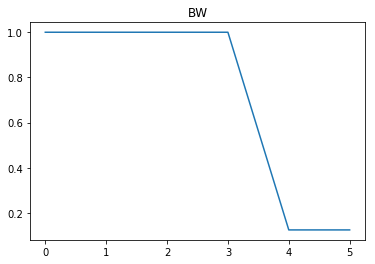

In [245]:
plt.plot(allsacdat1[247:253,3,2])
plt.title('BW')
plt.show()

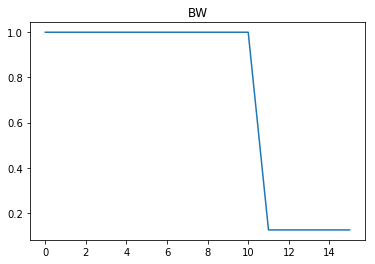

In [246]:
plt.plot(allsacdat1[240:256,3,2])
plt.title('BW')
plt.show()

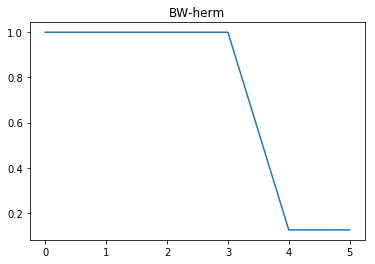

In [247]:
plt.plot(hermydat[247:253])
plt.title('BW-herm')
plt.show()

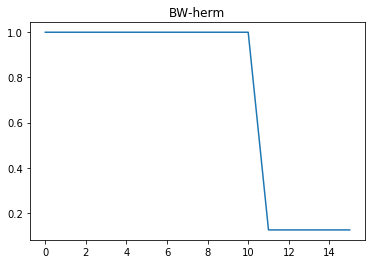

In [248]:
plt.plot(hermydat[240:256])
plt.title('BW-herm')
plt.show()

In [249]:
print(allsacdat1[250,3,0])
print(allsacdat1[250,3,2])

0.313125
0.999999883


In [250]:
print(allsacdat1[251,3,0])
print(allsacdat1[251,3,2])

0.314375
0.125000117


In [251]:
print(allsacdat1[254,3,2],hermydat[254],hermydat[254]-allsacdat1[254,3,2])

(0.1250000018, 0.125, -1.8000000101547897e-09)
